In [1]:
pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Inspect the first few rows of each dataset
print(customers.head())
print(products.head())
print(transactions.head())

# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Summary statistics of numeric columns
print(customers.describe())
print(products.describe())
print(transactions.describe())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [3]:
# Convert SignupDate and TransactionDate to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Check if there are any duplicates
print(customers.duplicated().sum())
print(products.duplicated().sum())
print(transactions.duplicated().sum())

# Remove duplicates if any
customers = customers.drop_duplicates()
products = products.drop_duplicates()
transactions = transactions.drop_duplicates()

0
0
0


C:\Users\kumar\AppData\Local\Temp\ipykernel_2488\1357237767.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='Region', palette='Set2')


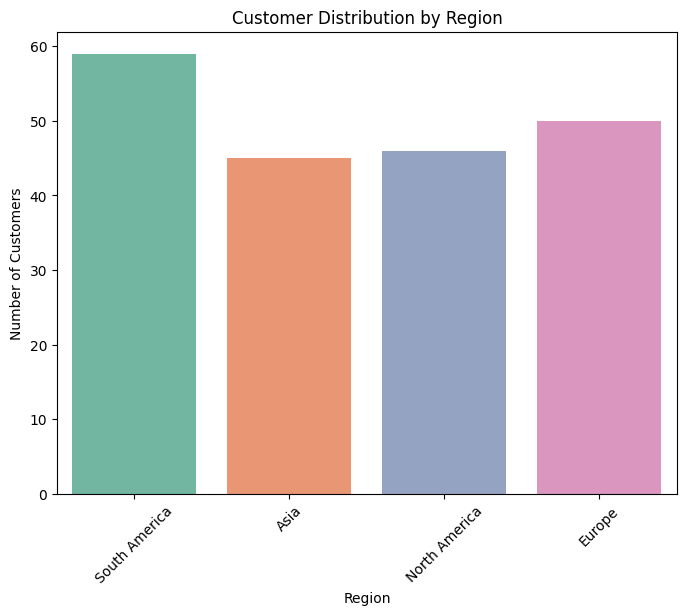

In [4]:
# Plot the distribution of customers by region
plt.figure(figsize=(8, 6))
sns.countplot(data=customers, x='Region', palette='Set2')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

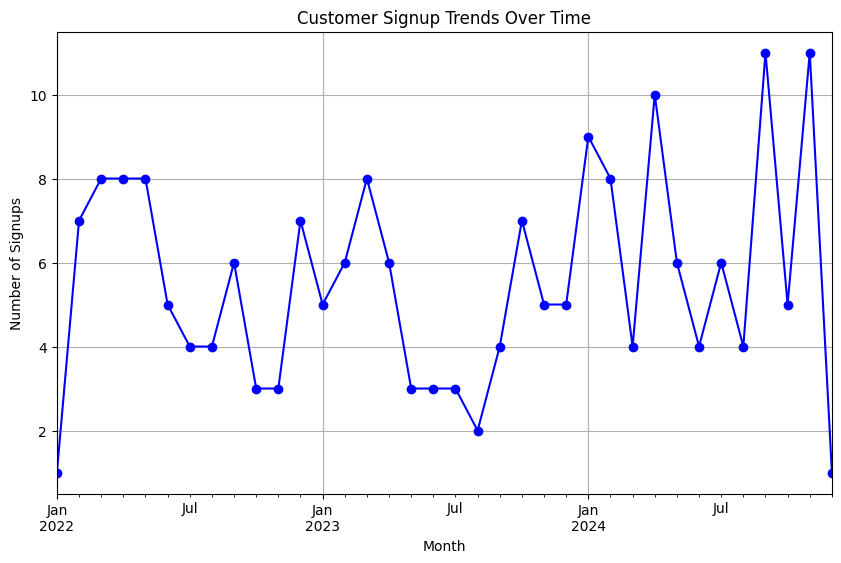

In [5]:
# Plot signups over time
customers['YearMonth'] = customers['SignupDate'].dt.to_period('M')
signup_trends = customers.groupby('YearMonth').size()

plt.figure(figsize=(10, 6))
signup_trends.plot(kind='line', marker='o', color='b')
plt.title('Customer Signup Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.grid(True)
plt.show()

C:\Users\kumar\AppData\Local\Temp\ipykernel_2488\3170650246.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=products, x='Category', palette='Set3')


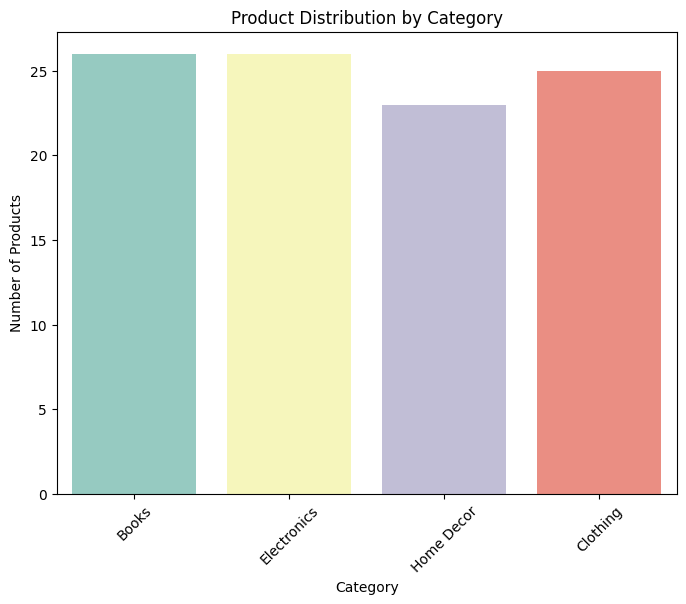

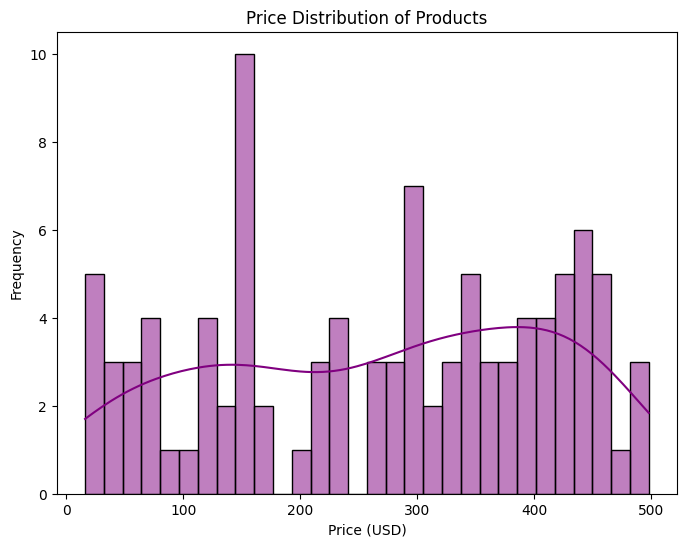

In [6]:
# Plot distribution of products by category
plt.figure(figsize=(8, 6))
sns.countplot(data=products, x='Category', palette='Set3')
plt.title('Product Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()

# Plot the price distribution of products
plt.figure(figsize=(8, 6))
sns.histplot(products['Price'], kde=True, color='purple', bins=30)
plt.title('Price Distribution of Products')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

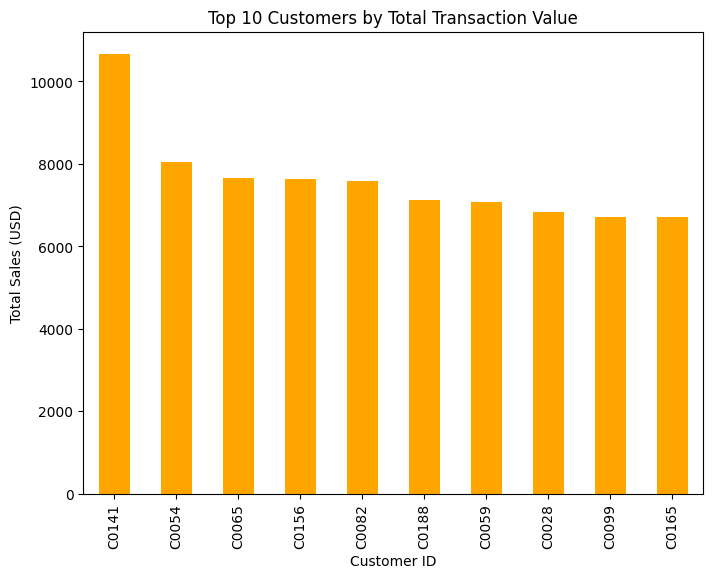

<Figure size 1000x600 with 0 Axes>

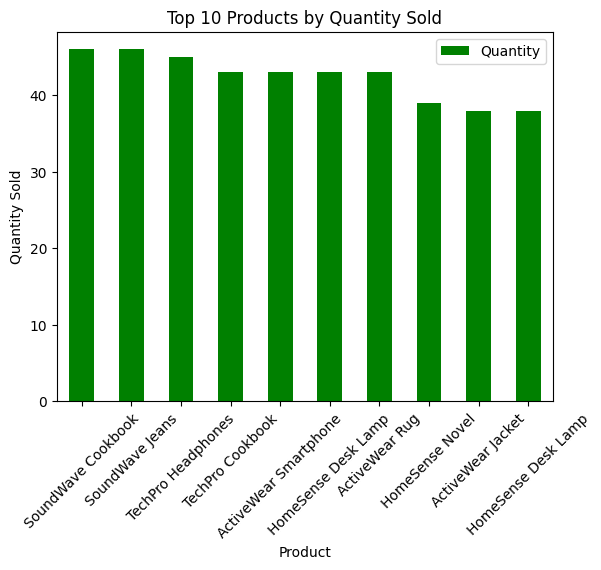

In [7]:
# Total transaction value per customer
customer_total_sales = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)

# Plot the top 10 customers by total sales
plt.figure(figsize=(8, 6))
customer_total_sales.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Customers by Total Transaction Value')
plt.xlabel('Customer ID')
plt.ylabel('Total Sales (USD)')
plt.show()

# Transaction frequency by product
product_sales = transactions.groupby('ProductID')['Quantity'].sum()

# Merge with product information to get product names
product_sales = product_sales.reset_index()
product_sales = pd.merge(product_sales, products[['ProductID', 'ProductName']], on='ProductID')

# Plot top 10 products by quantity sold
plt.figure(figsize=(10, 6))
product_sales.sort_values(by='Quantity', ascending=False).head(10).plot(kind='bar', x='ProductName', y='Quantity', color='green')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

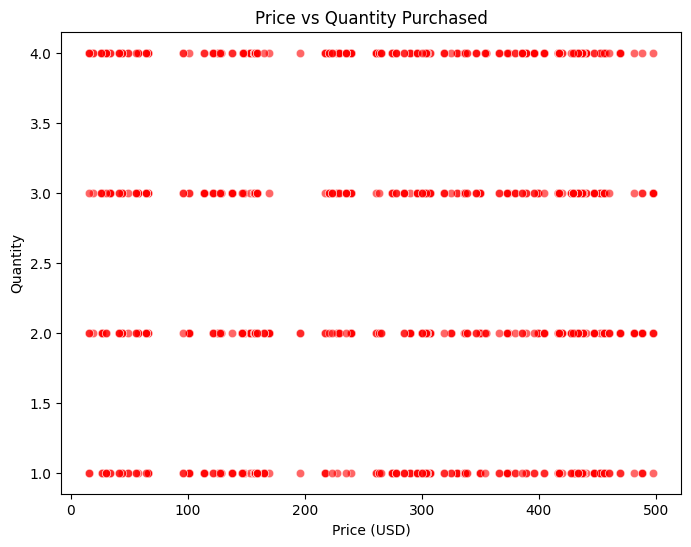

In [8]:
# Plot relationship between price and quantity purchased
plt.figure(figsize=(8, 6))
sns.scatterplot(data=transactions, x='Price', y='Quantity', alpha=0.6, color='red')
plt.title('Price vs Quantity Purchased')
plt.xlabel('Price (USD)')
plt.ylabel('Quantity')
plt.show()